In [ ]:
#|hide
#| eval: false
! [ -e /content ] && pip install -Uqq fastai  # upgrade fastai on colab

In [ ]:
#|export
from __future__ import annotations
from fastai.basics import *

In [ ]:
#|hide
from nbdev.showdoc import *

In [ ]:
#|default_exp callback.progress

# Progress and logging

> Callback and helper function to track progress of training or log results

In [ ]:
from fastai.test_utils import *

## ProgressCallback -

In [ ]:
#|export
@docs
class ProgressCallback(Callback):
    "A `Callback` to handle the display of progress bars"
    order,_stateattrs = 60,('mbar','pbar')

    def before_fit(self):
        assert hasattr(self.learn, 'recorder')
        if self.create_mbar: self.mbar = master_bar(list(range(self.n_epoch)))
        if self.learn.logger != noop:
            self.old_logger,self.learn.logger = self.logger,self._write_stats
            self._write_stats(self.recorder.metric_names)
        else: self.old_logger = noop

    def before_epoch(self):
        if getattr(self, 'mbar', False): self.mbar.update(self.epoch)

    def before_train(self):    self._launch_pbar()
    def before_validate(self): self._launch_pbar()
    def after_train(self):     self.pbar.on_iter_end()
    def after_validate(self):  self.pbar.on_iter_end()
    def after_batch(self):
        self.pbar.update(self.iter+1)
        if hasattr(self, 'smooth_loss'): self.pbar.comment = f'{self.smooth_loss:.4f}'

    def _launch_pbar(self):
        self.pbar = progress_bar(self.dl, parent=getattr(self, 'mbar', None), leave=False)
        self.pbar.update(0)

    def after_fit(self):
        if getattr(self, 'mbar', False):
            self.mbar.on_iter_end()
            delattr(self, 'mbar')
        if hasattr(self, 'old_logger'): self.learn.logger = self.old_logger

    def _write_stats(self, log):
        if getattr(self, 'mbar', False): self.mbar.write([f'{l:.6f}' if isinstance(l, float) else str(l) for l in log], table=True)

    _docs = dict(before_fit="Setup the master bar over the epochs",
                 before_epoch="Update the master bar",
                 before_train="Launch a progress bar over the training dataloader",
                 before_validate="Launch a progress bar over the validation dataloader",
                 after_train="Close the progress bar over the training dataloader",
                 after_validate="Close the progress bar over the validation dataloader",
                 after_batch="Update the current progress bar",
                 after_fit="Close the master bar")

if not hasattr(defaults, 'callbacks'): defaults.callbacks = [TrainEvalCallback, Recorder, ProgressCallback]
elif ProgressCallback not in defaults.callbacks: defaults.callbacks.append(ProgressCallback)

In [ ]:
learn = synth_learner()
learn.fit(5)

epoch,train_loss,valid_loss,time
0,14.523648,10.988108,00:00
1,12.395808,7.306935,00:00
2,10.121231,4.370981,00:00
3,8.065226,2.487984,00:00
4,6.374166,1.368232,00:00


In [ ]:
#|export
@patch
@contextmanager
def no_bar(self:Learner):
    "Context manager that deactivates the use of progress bars"
    has_progress = hasattr(self, 'progress')
    if has_progress: self.remove_cb(self.progress)
    try: yield self
    finally:
        if has_progress: self.add_cb(ProgressCallback())

In [ ]:
learn = synth_learner()
with learn.no_bar(): learn.fit(5)

[0, 15.748106002807617, 12.352150917053223, '00:00']
[1, 13.818815231323242, 8.879858016967773, '00:00']
[2, 11.650713920593262, 5.857329845428467, '00:00']
[3, 9.595088005065918, 3.7397098541259766, '00:00']
[4, 7.814438343048096, 2.327916145324707, '00:00']


In [ ]:
#|hide
#Check validate works without any training
def tst_metric(out, targ): return F.mse_loss(out, targ)
learn = synth_learner(n_trn=5, metrics=tst_metric)
preds,targs = learn.validate()

In [ ]:
#|hide
#Check get_preds works without any training
learn = synth_learner(n_trn=5, metrics=tst_metric)
preds,targs = learn.validate()

In [ ]:
show_doc(ProgressCallback.before_fit)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L16){target="_blank" style="float:right; font-size:smaller"}

### ProgressCallback.before_fit

>      ProgressCallback.before_fit ()

Setup the master bar over the epochs

In [ ]:
show_doc(ProgressCallback.before_epoch)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L24){target="_blank" style="float:right; font-size:smaller"}

### ProgressCallback.before_epoch

>      ProgressCallback.before_epoch ()

Update the master bar

In [ ]:
show_doc(ProgressCallback.before_train)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L27){target="_blank" style="float:right; font-size:smaller"}

### ProgressCallback.before_train

>      ProgressCallback.before_train ()

Launch a progress bar over the training dataloader

In [ ]:
show_doc(ProgressCallback.before_validate)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L28){target="_blank" style="float:right; font-size:smaller"}

### ProgressCallback.before_validate

>      ProgressCallback.before_validate ()

Launch a progress bar over the validation dataloader

In [ ]:
show_doc(ProgressCallback.after_batch)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L31){target="_blank" style="float:right; font-size:smaller"}

### ProgressCallback.after_batch

>      ProgressCallback.after_batch ()

Update the current progress bar

In [ ]:
show_doc(ProgressCallback.after_train)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L29){target="_blank" style="float:right; font-size:smaller"}

### ProgressCallback.after_train

>      ProgressCallback.after_train ()

Close the progress bar over the training dataloader

In [ ]:
show_doc(ProgressCallback.after_validate)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L30){target="_blank" style="float:right; font-size:smaller"}

### ProgressCallback.after_validate

>      ProgressCallback.after_validate ()

Close the progress bar over the validation dataloader

In [ ]:
show_doc(ProgressCallback.after_fit)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L39){target="_blank" style="float:right; font-size:smaller"}

### ProgressCallback.after_fit

>      ProgressCallback.after_fit ()

Close the master bar

## ShowGraphCallback -

In [ ]:
#|export
class ShowGraphCallback(Callback):
    "Update a graph of training and validation loss"
    order,run_valid=65,False

    def before_fit(self):
        self.run = not hasattr(self.learn, 'lr_finder') and not hasattr(self, "gather_preds")
        if not(self.run): return
        self.nb_batches = []
        assert hasattr(self.learn, 'progress')

    def after_train(self): self.nb_batches.append(self.train_iter)

    def after_epoch(self):
        "Plot validation loss in the pbar graph"
        if not self.nb_batches: return
        rec = self.learn.recorder
        iters = range_of(rec.losses)
        val_losses = [v[1] for v in rec.values]
        x_bounds = (0, (self.n_epoch - len(self.nb_batches)) * self.nb_batches[0] + len(rec.losses))
        y_bounds = (0, max((max(Tensor(rec.losses)), max(Tensor(val_losses)))))
        self.progress.mbar.update_graph([(iters, rec.losses), (self.nb_batches, val_losses)], x_bounds, y_bounds)

epoch,train_loss,valid_loss,time
0,17.683565,10.431150,00:00
1,15.232769,7.056944,00:00
2,12.470916,4.382421,00:00
3,10.000675,2.574951,00:00
4,7.943449,1.464153,00:00


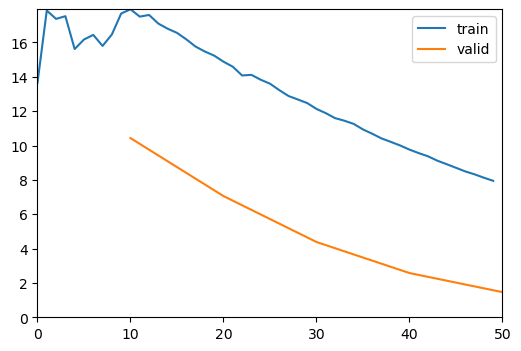

In [ ]:
#|slow
learn = synth_learner(cbs=ShowGraphCallback())
learn.fit(5)

In [ ]:
learn.predict(torch.tensor([[0.1]]))

(tensor([1.8955]), tensor([1.8955]), tensor([1.8955]))

## CSVLogger -

In [ ]:
#|export
class CSVLogger(Callback):
    "Log the results displayed in `learn.path/fname`"
    order=60
    def __init__(self, fname='history.csv', append=False):
        self.fname,self.append = Path(fname),append

    def read_log(self):
        "Convenience method to quickly access the log."
        return pd.read_csv(self.path/self.fname)

    def before_fit(self):
        "Prepare file with metric names."
        if hasattr(self, "gather_preds"): return
        self.path.parent.mkdir(parents=True, exist_ok=True)
        self.file = (self.path/self.fname).open('a' if self.append else 'w')
        self.file.write(','.join(self.recorder.metric_names) + '\n')
        self.old_logger,self.learn.logger = self.logger,self._write_line

    def _write_line(self, log):
        "Write a line with `log` and call the old logger."
        self.file.write(','.join([str(t) for t in log]) + '\n')
        self.file.flush()
        os.fsync(self.file.fileno())
        self.old_logger(log)

    def after_fit(self):
        "Close the file and clean up."
        if hasattr(self, "gather_preds"): return
        self.file.close()
        self.learn.logger = self.old_logger

The results are appended to an existing file if `append`, or they overwrite it otherwise.

In [ ]:
learn = synth_learner(cbs=CSVLogger())
learn.fit(5)

epoch,train_loss,valid_loss,time
0,15.606769,14.485189,00:00
1,13.840394,10.834929,00:00
2,11.842106,7.582738,00:00
3,9.937692,5.158300,00:00
4,8.244681,3.432087,00:00


In [ ]:
show_doc(CSVLogger.read_log)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L101){target="_blank" style="float:right; font-size:smaller"}

### CSVLogger.read_log

>      CSVLogger.read_log ()

Convenience method to quickly access the log.

In [ ]:
df = learn.csv_logger.read_log()
test_eq(df.columns.values, learn.recorder.metric_names)
for i,v in enumerate(learn.recorder.values):
    test_close(df.iloc[i][:3], [i] + v)
os.remove(learn.path/learn.csv_logger.fname)

In [ ]:
show_doc(CSVLogger.before_fit)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L105){target="_blank" style="float:right; font-size:smaller"}

### CSVLogger.before_fit

>      CSVLogger.before_fit ()

Prepare file with metric names.

In [ ]:
show_doc(CSVLogger.after_fit)

---

[source](https://github.com/fastai/fastai/blob/master/fastai/callback/progress.py#L120){target="_blank" style="float:right; font-size:smaller"}

### CSVLogger.after_fit

>      CSVLogger.after_fit ()

Close the file and clean up.

## Export -

In [ ]:
#|hide
from nbdev import nbdev_export
nbdev_export()